📋 Revenue Summary Table:

    product  total_qty   revenue
0       BMW         11  495000.0
1      Ford         16  352000.0
2   Hyundai         10  180000.0
3  Mercedes          4  220000.0
4    Toyota         27  675000.0


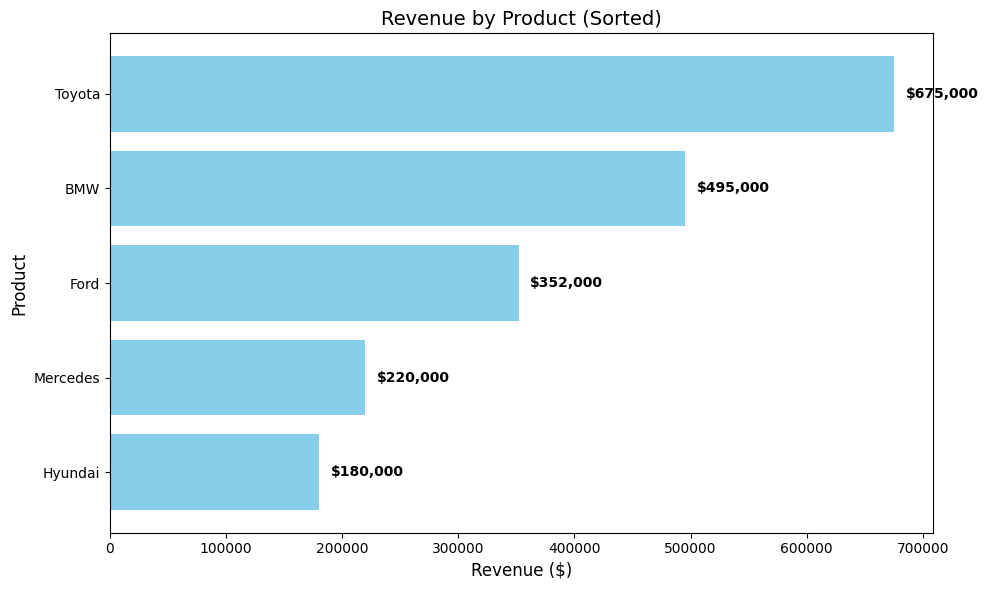

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create SQLite connection
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Drop table if exists
cursor.execute("DROP TABLE IF EXISTS sales")

# Step 3: Create sales table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 4: Insert sample sales data
sales_data = [
    ("Toyota", 12, 25000),
    ("Ford", 9, 22000),
    ("BMW", 5, 45000),
    ("Toyota", 15, 25000),
    ("Ford", 7, 22000),
    ("BMW", 6, 45000),
    ("Hyundai", 10, 18000),
    ("Mercedes", 4, 55000),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

# Step 5: Query summary data
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    ROUND(SUM(quantity * price), 2) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# Step 6: Show the table
print("📋 Revenue Summary Table:\n")
print(df)

# Step 7: Sort by revenue descending for plotting
df_sorted = df.sort_values(by="revenue", ascending=False)

# Step 8: Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['product'], df_sorted['revenue'], color='skyblue')
plt.gca().invert_yaxis()  # Highest revenue at the top

# Step 9: Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2,
             f"${int(width):,}", va='center', fontsize=10, fontweight='bold')

# Step 10: Customize plot
plt.title("Revenue by Product (Sorted)", fontsize=14)
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()

# Step 11: Save and show plot
plt.savefig("sorted_revenue_by_product.png", dpi=300)
plt.show()

# Step 12: Close connection
conn.close()
